In [2]:
import math
import numpy as np
import scipy.stats as scs 
import matplotlib.pyplot as plt 
import numpy.random as random
from copy import copy
import seaborn as sns
sns.set_theme()

# Exercice 17

In [3]:
def uniforme(a, b, size=1):
    if size==1:
        return a + (b-a)*random.random()
    else:
        return (lambda x : a+(b-a)*x)(random.random(size))

In [4]:
def points_uniformes(a, b, K, **kwargs):
    if len(kwargs)==0 or kwargs["size"]==1:
        return np.array([uniforme(a, b), uniforme(0, K)])
    else:
        return np.array([uniforme(a, b, **kwargs), uniforme(0, K, **kwargs)]).transpose()

On a $\int_1^2 x^2 dx = 7/3$, donc il faut $c=3/7$. Alors, $f(x) = cx^2$ est bornée par $K = 12/7$ sur l'intervalle $[1,2]$. La fonction de répartition de $f$ s'écrit :
$$F(x) = \begin{cases} 0 & \text{si }x\leq 1,\\
\frac{x^3-1}{7} & \text{si }1<x \leq 2,\\ 
1 &\text{si }x\geq 2.\end{cases}$$

In [5]:
def nuage_points(N, f, a, b, K):
    alea = points_uniformes(a, b, K, size=N)
    alea_bleu = np.array([x for x in alea if f(x[0]) < x[1]]).transpose()
    alea_rouge = np.array([x for x in alea if f(x[0]) >= x[1]]).transpose()
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(alea_bleu[0], alea_bleu[1], color=sns.color_palette()[0])
    ax.scatter(alea_rouge[0], alea_rouge[1], color=sns.color_palette()[1])
    ax.set_title(f"Nuage de points dans le rectangle $[{a},{b}] * [0,{K}]$")
    ax.set_xlim([a,b])
    ax.set_ylim([0,K])
    xx = np.linspace(a, b, 500)
    ax.plot(xx, f(xx), color="black")
    plt.show()

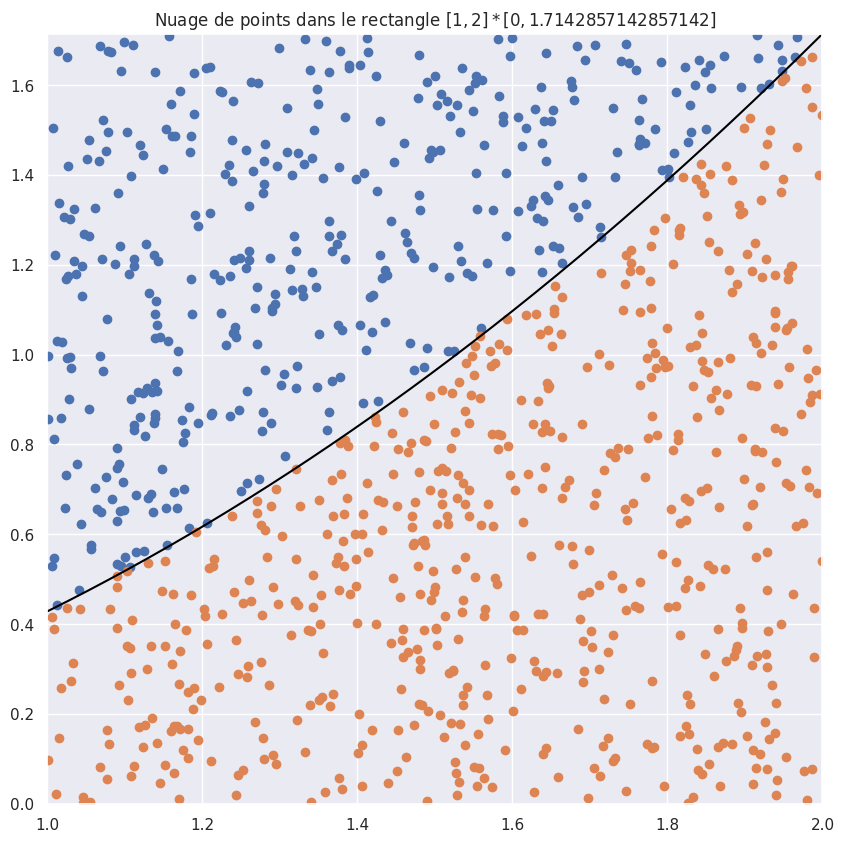

In [6]:
f = (lambda x : 3*x*x/7)
K = 12/7
nuage_points(1000, f, 1, 2, K)

Chaque événement $f(X_i) > Y_i$ a pour probabilité :
\begin{align*}
p &= \frac{1}{K(b-a)} \int_{x=a}^b \int_{y=0}^K 1_{y < f(x)} \,dx \,dy =\frac{1}{K(b-a)} \int_{x=a}^b f(x) \,dx = \frac{1}{K(b-a)}.
\end{align*}
Remarquons que ceci est plus petit que $1$ : puisque la densité ne dépasse pas $K$, la taille de l'intervalle $[a,b]$ doit être plus grande que $\frac{1}{K}$, donc $p \leq 1$. On a alors par indépendance :
$$\mathbb{P}[M > n] = (1-p)^n.$$
La variable $M$ suit donc une loi géométrique de paramètre $p$.
On calcule ensuite :
\begin{align*}
\mathbb{P}[X_1 < t,\,\,f(X_1) > Y_1] &= \frac{1}{K(b-a)} \int_{x=a}^t \int_{y=0}^K 1_{y < f(x)} \,dx \,dy = \frac{1}{K(b-a)} \int_{x=a}^t f(x) \,dx = \frac{F(t)}{K(b-a)} = p\,F(t).
\end{align*}
et on en déduit la probabilité conditionnelle $\mathbb{P}[X_1 < t\,|\,f(X_1) > Y_1] = F(t)$.
On en déduit par décomposition suivant la valeur de $M$ :
\begin{align*}
\mathbb{P}[X_M < t] &= \sum_{n=1}^\infty \mathbb{P}[M=n] \,\mathbb{P}[X_n < t\,|\,M=n] \\ 
&= F(t)\,\sum_{n=1}^\infty \mathbb{P}[M=n] = F(t).
\end{align*}
Donc, $X_M$ a pour densité $f$.

In [7]:
def point_rejet(f, a, b, K):
    while True:
        x, y = tuple(points_uniformes(a, b, K))
        if f(x) > y:
            return (x, y)

In [8]:
point_rejet((lambda x : 3*x*x/7), 1, 2, 12/7)

(1.9906291949692658, 0.07171814618217898)

In [9]:
def nuage_points_rejet(N, f, a, b, K):
    alea = np.zeros((N,2))
    for i in range(N):
        alea[i] = np.array(point_rejet(f, a, b, K))
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(alea.transpose()[0], alea.transpose()[1], color=sns.color_palette()[1])
    ax.set_title(f"Nuage de points rejetés dans le rectangle $[{a},{b}] * [0,{K}]$")
    ax.set_xlim([a,b])
    ax.set_ylim([0,K])
    xx = np.linspace(a, b, 500)
    ax.plot(xx, f(xx), color="black")
    plt.show()

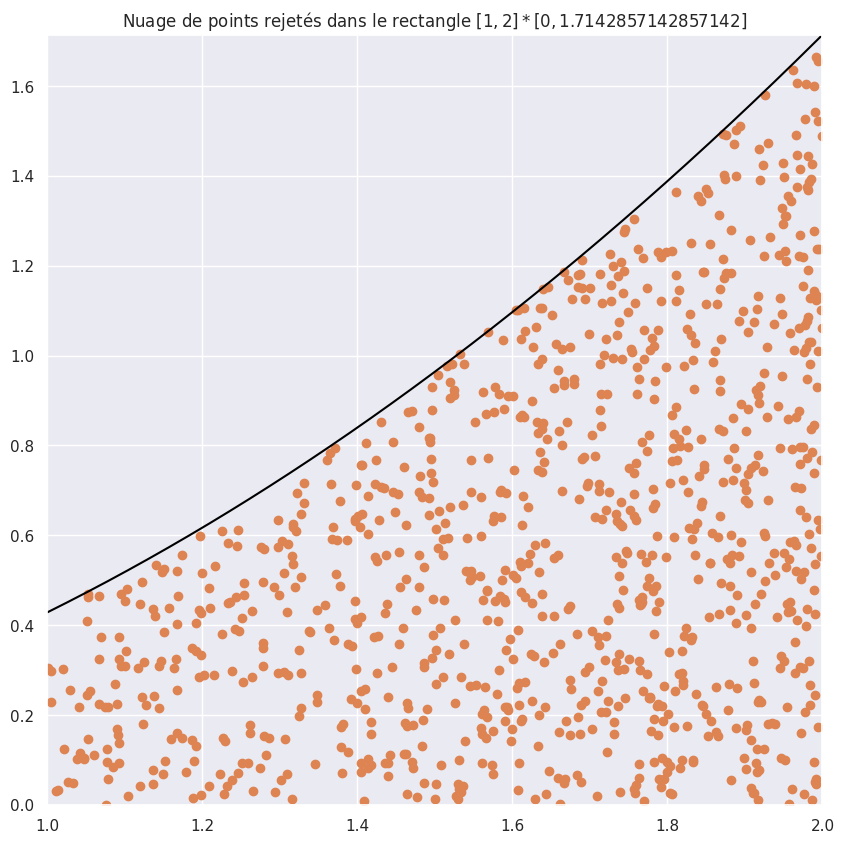

In [10]:
nuage_points_rejet(1000,(lambda x : 3*x*x/7), 1, 2, 12/7)

In [11]:
def verification(N, f, F, a, b, K):
    alea = np.zeros(N)
    for i in range(N):
        alea[i] = point_rejet(f, a, b, K)[0]
    fig, ax = plt.subplots(figsize=(10,5))
    xx = np.linspace(a, b, 500)
    ax.plot(xx, F(xx), color="black")
    ax.ecdf(alea)
    plt.show()

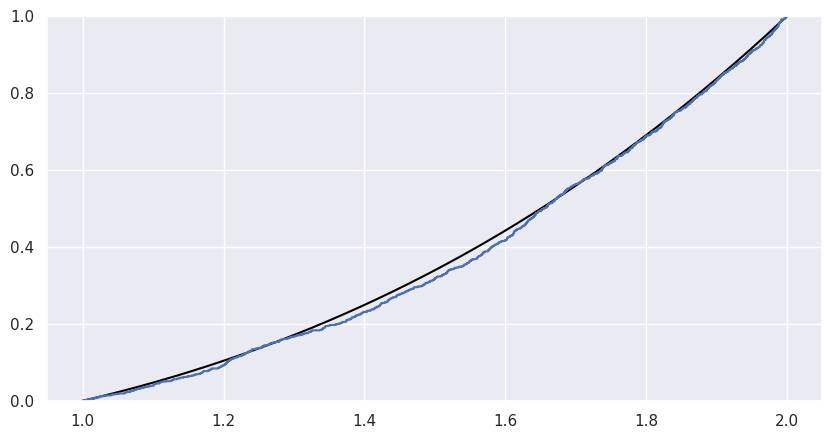

In [12]:
f = (lambda x : 3*x*x/7)
F = (lambda x : (x*x*x - 1)/7)
K = 12/7
verification(1000, f, F, 1, 2, K)

# Exercice 18

In [13]:
def laplace(size=1):
    X = scs.expon.rvs(size=size)
    Z = (lambda x : 2*x-1)(random.randint(2, size=size))
    return X*Z

Le rapport $f(x) / g(x)$ vaut $\sqrt{\frac{2}{\pi}} \,\exp(-\frac{x^2}{2} + |x|)$. Or, $-\frac{x^2}{2}+ |x|$ est maximal pour $|x|=1$, donc on peut prendre :
$$ K = \sqrt{\frac{2\mathrm{e}}{\pi}}.$$

In [14]:
def points_domaine(N, f, simg, g, K):
    X = np.array(simg(size=N))
    Y = (lambda x : K*g(x))(X) * random.random(N)
    alea = np.array([X, Y]).transpose()
    alea_bleu = np.array([x for x in alea if f(x[0]) < x[1]]).transpose()
    alea_orange = np.array([x for x in alea if f(x[0]) >= x[1]]).transpose()
    fig, ax = plt.subplots(figsize=(10,10))
    if len(alea_bleu)>0:
        ax.scatter(alea_bleu[0], alea_bleu[1], color=sns.color_palette()[0])
    if len(alea_orange)>0:
        ax.scatter(alea_orange[0], alea_orange[1], color=sns.color_palette()[1])
    ax.set_title(f"Nuage de points dans le domaine 0<y<K g(x)$")
    a,b = min(X), max(X)
    ax.set_xlim([a,b])
    xx = np.linspace(a, b, 500)
    ax.plot(xx, K*g(xx), color="black")
    ax.plot(xx, f(xx), color=sns.color_palette()[0])
    plt.show()

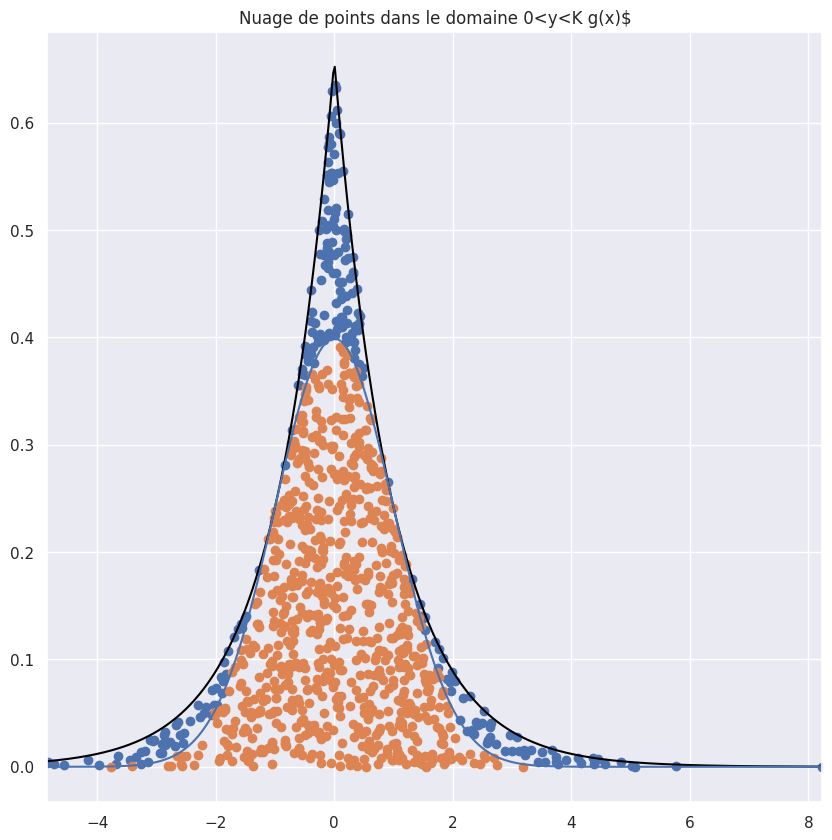

In [15]:
points_domaine(1000, (lambda x : np.exp(-x*x/2)/np.sqrt(2*np.pi)), laplace, (lambda x : 0.5*np.exp(-np.abs(x))), np.sqrt(2*np.exp(1)/np.pi))

In [16]:
def rejet(f, simg, g, K):
    while True:
        x = simg()
        y = K * g(x) * random.random()
        if f(x) > y:
            return np.array([*x, *y])

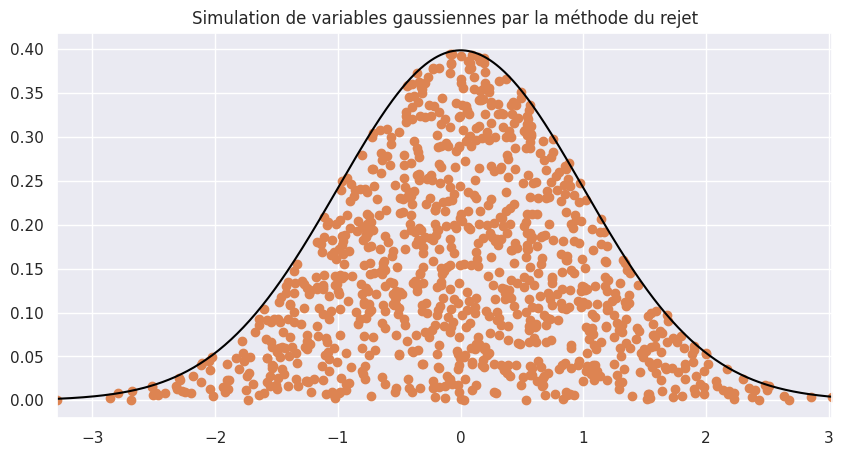

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
alea = np.zeros((1000,2))
f = (lambda x : np.exp(-x*x/2)/np.sqrt(2*np.pi))
g = (lambda x : 0.5 * np.exp(-np.abs(x)))
K = np.sqrt(2*np.exp(1)/np.pi)
for i in range(1000):
    alea[i] = rejet(f, laplace, g, K)
ax.scatter(alea.transpose()[0], alea.transpose()[1], color=sns.color_palette()[1])
ax.set_title(f"Simulation de variables gaussiennes par la méthode du rejet")
a,b = min(alea.transpose()[0]), max(alea.transpose()[0])
ax.set_xlim([a,b])
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), color="black")
plt.show()

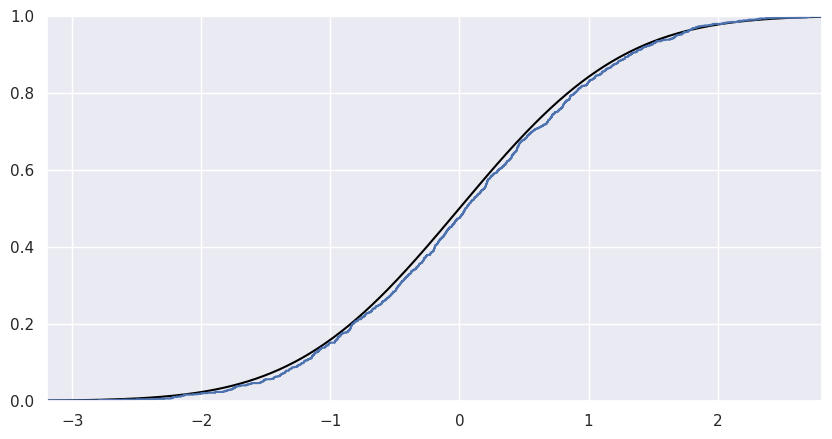

In [18]:
alea = np.zeros((1000,2))
f = (lambda x : np.exp(-x*x/2)/np.sqrt(2*np.pi))
g = (lambda x : 0.5 * np.exp(-np.abs(x)))
K = np.sqrt(2*np.exp(1)/np.pi)
for i in range(1000):
    alea[i] = rejet(f, laplace, g, K)
fig, ax = plt.subplots(figsize=(10,5))
a,b = min(alea.transpose()[0]), max(alea.transpose()[0])
ax.set_xlim([a,b])
xx = np.linspace(a, b, 500)
ax.plot(xx, scs.norm.cdf(xx), color="black")
ax.ecdf(alea.transpose()[0])
plt.show()